# First glance at the data

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
# Load the Excel file
file_path = '/home/leo/Documents/These/Données/Rearangement_OB2.xlsx'  # Replace with the path to your file
df = pd.read_excel(file_path)

/home/leo/micromamba/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


## Cleanup and visualization

The focus is on the two aedes species present on the island

In [16]:
# Filter rows where 'species' column is equal to 'ae_poly'
Poly_df = df[(df['Spc'] == 'ae_poly') & (df['Motu'] == 'Onetahi')]
Aegipty_df = df[(df['Spc'] == 'ae_aeg') & (df['Motu'] == 'Onetahi')]

There's a first cleanup to do on the dates values. We'll convert them to datetime objects and check for missing values.

In [17]:
Poly_df.loc[-82:, 'Date'].values

array([datetime.datetime(2014, 1, 4, 0, 0),
       datetime.datetime(2014, 1, 4, 0, 0),
       datetime.datetime(2014, 1, 4, 0, 0), ..., 19, 19, 19], dtype=object)

In [18]:
Poly_df['Date'][-82:].values

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19],
      dtype=object)

In [19]:
# Ensure 'Date' column is in datetime format
Poly_df['Date'][:-82] = pd.to_datetime(Poly_df['Date'][:-82])
Aegipty_df.loc[:-80, 'Date'] = pd.to_datetime(Aegipty_df.loc[:-80, 'Date'])

# Convert month names to month numbers
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

date_poly = pd.DataFrame({
    'Day': Poly_df['Date'][-82:].values,
    'Month': Poly_df['Month'][-82:].map(month_map).values,
    'Year': [2024] * 82
})
date_aeg = pd.DataFrame({
    'Day': Aegipty_df['Date'][-80:].values,
    'Month': Aegipty_df['Month'][-80:].map(month_map).values,
    'Year': [2023] * 80
})
#date_aeg[['Year', 'Month', 'Day']]

Poly_df['Date'][-82:] = pd.to_datetime(date_poly[['Year', 'Month', 'Day']])
Aegipty_df['Date'][-80:] = pd.to_datetime(date_aeg[['Year', 'Month', 'Day']])

/tmp/ipykernel_12052/1891941832.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Poly_df['Date'][:-82] = pd.to_datetime(Poly_df['Date'][:-82])
/tmp/ipykernel_12052/1891941832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a

We now have to handle the Nan values. They are for now removed from the file (most of them are from Covid I think).

In [20]:
# Split the dataset based on the 'action' column
df_poly_r = Poly_df[Poly_df['Action'] == 'Release'].copy()  # Rows where 'action' is 'Release'
df_poly_c = Poly_df[Poly_df['Action'] == 'Capture'].copy()  # Rows where 'action' is 'Capture'
df_aegipty_c = Aegipty_df[Aegipty_df['Action'] == 'Capture'].copy()  # Rows where 'action' is 'Capture'

# Clean 'Nb_ind' column by replacing 'NA ' or NaN values with np.nan and dropping them
df_poly_r = df_poly_r.dropna(subset=['Nb_ind'])
df_poly_c['Nb_ind'] = df_poly_c['Nb_ind'].replace('NA ', np.nan)
df_poly_c = df_poly_c.dropna(subset=['Nb_ind'])
df_poly_c = df_poly_c.dropna(subset=['Date'])

df_aegipty_c['Nb_ind'] = df_aegipty_c['Nb_ind'].replace('NA ', np.nan)
df_aegipty_c = df_aegipty_c.dropna(subset=['Nb_ind'])
df_aegipty_c = df_aegipty_c.dropna(subset=['Date'])

# Display the DataFrames
print(df_poly_r.head())
print(df_poly_c.head())
print(df_aegipty_c.head())

            Year     Month                 Date  Sem_num       Ile     Motu  \
56816  Year_2018   October  2018-10-17 00:00:00       42  Tetiaroa  Onetahi   
57186  Year_2018   October  2018-10-23 00:00:00       43  Tetiaroa  Onetahi   
57556  Year_2018   October  2018-10-30 00:00:00       44  Tetiaroa  Onetahi   
57926  Year_2018  November  2018-11-06 00:00:00       45  Tetiaroa  Onetahi   
58296  Year_2018  November  2018-11-13 00:00:00       46  Tetiaroa  Onetahi   

      Trap_type Trap_num  Duration      Spc  Nb_cup  Nb_per_cup Nb_ind Sex  \
56816     BGSv1     BG-A     168.0  ae_poly    61.0       690.0  42090   M   
57186     BGSv1     BG-A     168.0  ae_poly    54.0       690.0  37260   M   
57556     BGSv1     BG-A     168.0  ae_poly    96.0       690.0  66240   M   
57926     BGSv1     BG-A     168.0  ae_poly   103.0       690.0  71070   M   
58296     BGSv1     BG-A     168.0  ae_poly    69.0       690.0  47610   M   

        Action Agent_terrain Agent_tri  Period Comment  

/tmp/ipykernel_12052/2196757401.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_poly_c['Nb_ind'] = df_poly_c['Nb_ind'].replace('NA ', np.nan)
/tmp/ipykernel_12052/2196757401.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_aegipty_c['Nb_ind'] = df_aegipty_c['Nb_ind'].replace('NA ', np.nan)


In [21]:

# Optionally, save the filtered data to a new csv file
#df_poly_r.to_csv('../Data/df_poly_release.csv', index=False)
#df_poly_c.to_csv('../Data/df_poly_capture.csv', index=False)
#df_aegipty_c.to_csv('../Data/df_aegipty_cature.csv', index=False)

More info on the number of captured and released mosquitoes

In [22]:
# Get the numbre of mosquitoes released and captured 
nb_poly_mosquitoes_released = df_poly_r['Nb_ind'].sum()
nb_poly_mosquitoes_captured = df_poly_c['Nb_ind'].sum()
nb_aegipty_mosquitoes_captured = df_aegipty_c['Nb_ind'].sum()

print(f"Number of Ae. aegypti mosquitoes captured: {nb_aegipty_mosquitoes_captured}")
print(f"Number of Ae. polynesiensis mosquitoes captured: {nb_poly_mosquitoes_captured}")
print(f"Number of Ae. polynesiensis mosquitoes released: {nb_poly_mosquitoes_released}")

Number of Ae. aegypti mosquitoes captured: 3406.0
Number of Ae. polynesiensis mosquitoes captured: 23048.0
Number of Ae. polynesiensis mosquitoes released: 6853590


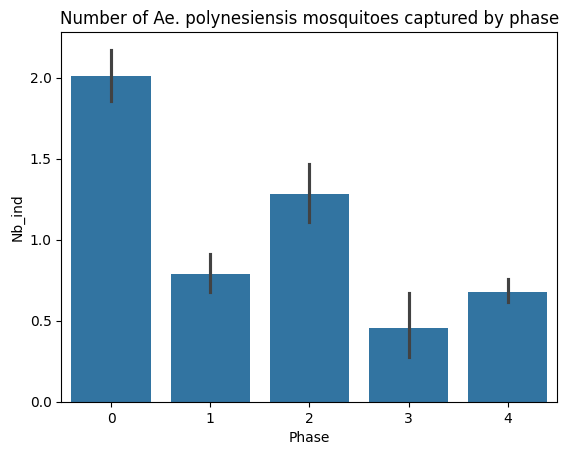

In [23]:
# Add a new variable in the df_poly_* : phase ! The phase 0 is the dates before the release of the mosquitoes (2018-10-17). The second is between this date and 2019-11-13. The 3rd is between 2019-11-13 and 2021-08-03. The 4th is from 2022-09-23. The last from 2022-10-09 to the end 
df_poly_r['Phase'] = '0'
df_poly_c['Phase'] = '0'

# Convert string dates to datetime objects
release_dates = [
	pd.to_datetime('2018-10-16'),
	pd.to_datetime('2019-11-13'),
	pd.to_datetime('2021-08-04'),
	pd.to_datetime('2022-09-22'),
	pd.to_datetime('2022-10-08')
]

df_poly_r['Phase'] = np.where(df_poly_r['Date'] > release_dates[0], '1', '0')
df_poly_c['Phase'] = np.where(df_poly_c['Date'] > release_dates[0], '1', '0')

df_poly_r['Phase'] = np.where(df_poly_r['Date'] > release_dates[1], '2', df_poly_r['Phase'])
df_poly_c['Phase'] = np.where(df_poly_c['Date'] > release_dates[1], '2', df_poly_c['Phase'])

df_poly_r['Phase'] = np.where(df_poly_r['Date'] > release_dates[2], 'Covid', df_poly_r['Phase'])
df_poly_c['Phase'] = np.where(df_poly_c['Date'] > release_dates[2], 'Covid', df_poly_c['Phase'])

df_poly_r['Phase'] = np.where(df_poly_r['Date'] > release_dates[3], '3', df_poly_r['Phase'])
df_poly_c['Phase'] = np.where(df_poly_c['Date'] > release_dates[3], '3', df_poly_c['Phase'])

df_poly_r['Phase'] = np.where(df_poly_r['Date'] > release_dates[4], '4', df_poly_r['Phase'])
df_poly_c['Phase'] = np.where(df_poly_c['Date'] > release_dates[4], '4', df_poly_c['Phase'])



# Plot the number of mosquitoes captured by phase
fig, ax = plt.subplots()
sns.barplot(x='Phase', y='Nb_ind', data=df_poly_c, ax=ax)
ax.set_title('Number of Ae. polynesiensis mosquitoes captured by phase')
plt.show()

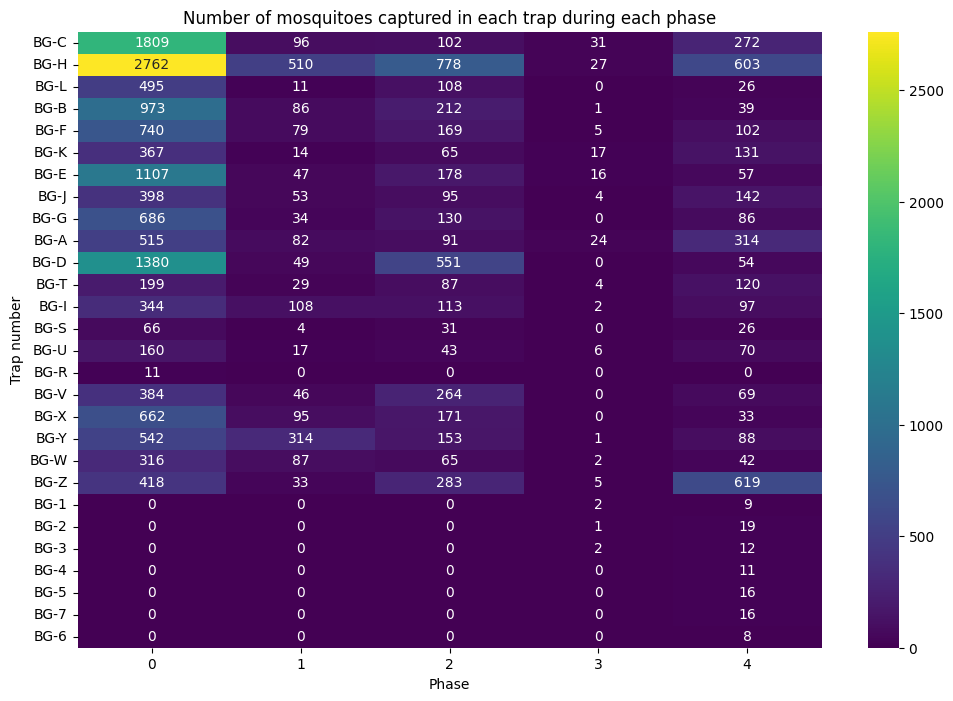

In [24]:
# Do a matrix, with lines corresponding to Trap_Num and column to the Phase. The values in the matrix are the number of mosquitoes captured in each trap during each phase divided by the number of capture by this trap on the given phase.
# The matrix will be a 2D numpy array
trap_num = df_poly_c['Trap_num'].unique()
phase = df_poly_c['Phase'].unique()
matrix = np.zeros((len(trap_num), len(phase)))
for i, trap in enumerate(trap_num):
    for j, ph in enumerate(phase):
        matrix[i, j] = df_poly_c[(df_poly_c['Trap_num'] == trap) & (df_poly_c['Phase'] == ph)]['Nb_ind'].sum()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, fmt='.0f', cmap='viridis', xticklabels=phase, yticklabels=trap_num)
plt.xlabel('Phase')
plt.ylabel('Trap number')
plt.title('Number of mosquitoes captured in each trap during each phase')
plt.show()


plots are great to have a better understanding. We can clearly see the impact of covid, and the change in the trap type after covid.

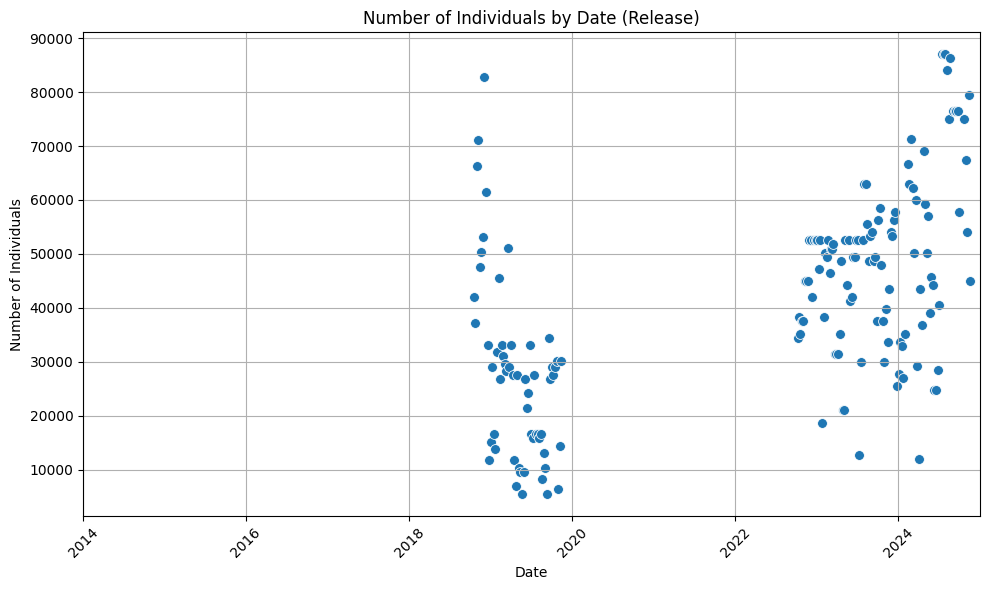

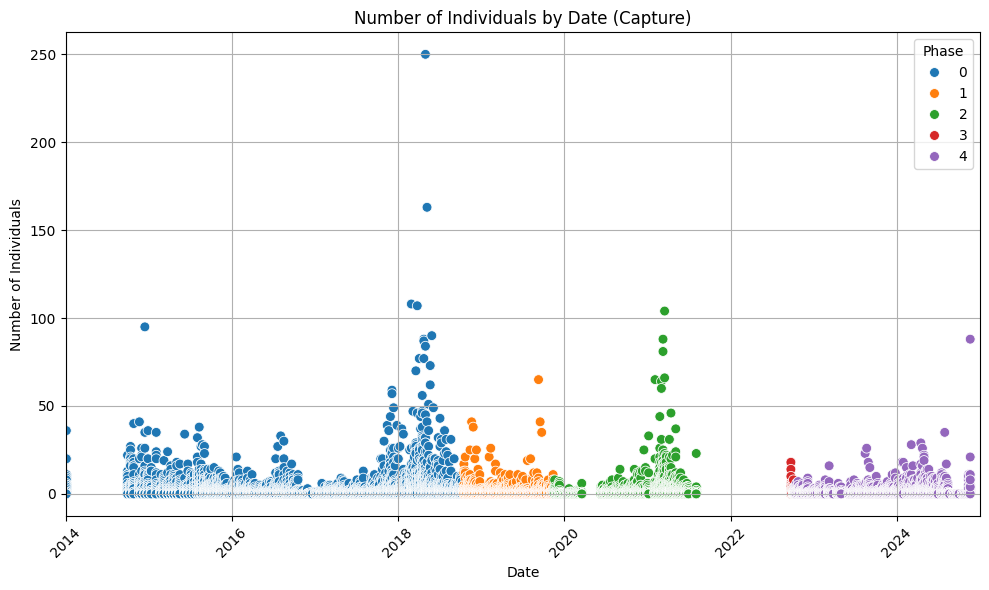

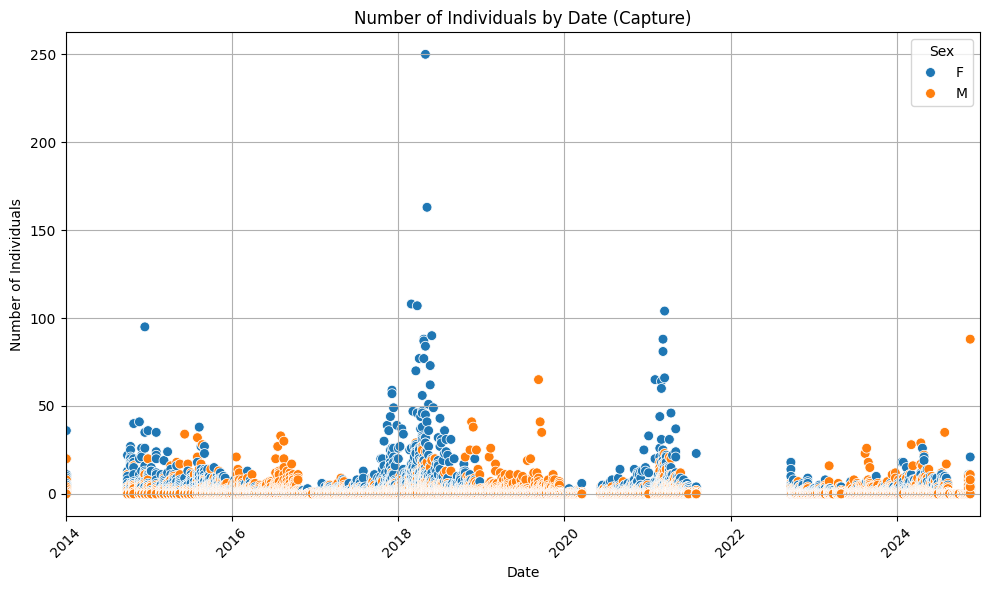

In [25]:
# Make a seaborn histogram the data for Release events 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_poly_r, x='Date', y='Nb_ind', s=50)
plt.title('Number of Individuals by Date (Release)')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2025-01-01'))
plt.ylabel('Number of Individuals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('../img/release_plot.png')
plt.show()

# Plot a double plot for the data for Capture events of poly depending on Phase. Use a different color for each phase

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_poly_c, x='Date', y='Nb_ind', hue='Phase', s=50)
plt.title('Number of Individuals by Date (Capture)')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2025-01-01'))
plt.ylabel('Number of Individuals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('../img/capture_plot_poly.png')
plt.show()

# Plot the data for Capture events
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_poly_c, x='Date', y='Nb_ind', hue='Sex', s=50)
plt.title('Number of Individuals by Date (Capture)')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2025-01-01'))
plt.ylabel('Number of Individuals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('../img/capture_plot_poly.png')
plt.show()

# Save each plot to a file


## Que peut-on faire avec le nombre de mâles relachés ?

En prenant le nombre de males relachés (pour la phase 1 et 4) : 
 - On peut faire la probabilité de capture en prenant en compte que la taille de pop est environ celle de la pop relachées, en prenant la semaine actuelle ou la semaine suivante;
 - Regarder le nombre de capture à la semaine $n-1$ pour prédire le nombre de lâchers à la semaine $n$;
 - Regarder tout ça par piège ?

21
27
1
1


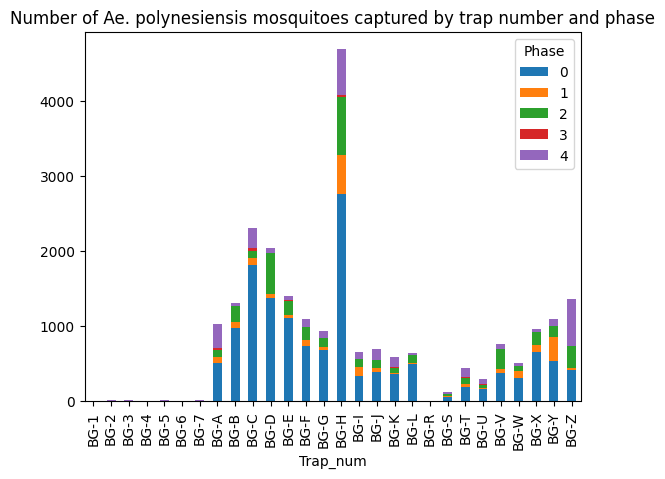

In [26]:
# Get the number of different values for the variable Trap_num for Trap_type = 'BGPro' et 'BGSv1'
print(df_poly_c[df_poly_c['Trap_type'] == 'BGSv1']['Trap_num'].nunique())
print(df_poly_c[df_poly_c['Trap_type'] == 'BGPro']['Trap_num'].nunique())
print(df_poly_r[df_poly_r['Trap_type'] == 'BGSv1']['Trap_num'].nunique())
print(df_poly_r[df_poly_r['Trap_type'] == 'BGPro']['Trap_num'].nunique())


# Plot or print the values depending
df_poly_c.groupby(['Trap_num', 'Phase'])['Nb_ind'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('Number of Ae. polynesiensis mosquitoes captured by trap number and phase')
plt.show()

In [60]:
print("Male phase 0 :",df_poly_c[(df_poly_c['Sex'] == 'M') & (df_poly_c['Phase'] == '0')]['Nb_ind'].sum())
print("Female phase 0 :",df_poly_c[(df_poly_c['Sex'] == 'F') & (df_poly_c['Phase'] == '0')]['Nb_ind'].sum())

Male phase 0 : 3894.0
Female phase 0 : 10440.0


In [61]:
print("Male phase 2 :",df_poly_c[(df_poly_c['Sex'] == 'M') & (df_poly_c['Phase'] == '2')]['Nb_ind'].sum())
print("Female phase 2 :",df_poly_c[(df_poly_c['Sex'] == 'F') & (df_poly_c['Phase'] == '2')]['Nb_ind'].sum())

Male phase 2 : 898.0
Female phase 2 : 2791.0


np.int64(2903)

In [27]:
# Create a weekly dataset, which only contains the df_r Date, Sex, Nb_ind, Trap_type, Trap_num, Phase
df_r_weekly = df_poly_r[['Date', 'Nb_ind', 'Phase']]
df_r_weekly.head()

,Date,Nb_ind,Phase
56816,2018-10-17 00:00:00,42090,1
57186,2018-10-23 00:00:00,37260,1
57556,2018-10-30 00:00:00,66240,1
57926,2018-11-06 00:00:00,71070,1
58296,2018-11-13 00:00:00,47610,1


In [28]:
# Create a new dataset cntaining the values for phase 1 and 4 in df_c
df_poly_c = df_poly_c[['Date', 'Sex', 'Nb_ind', 'Trap_type', 'Trap_num', 'Phase']]
df_poly_c.head()

#return the different values for Pphase in a list
print(df_poly_c['Phase'].unique())

['0' '1' '2' '3' '4']


In [29]:
# Create a new data set containing the values for phase 1 and 4 in df_c, whith only male mosqitoes and the sum of all the mosquitoes captured by day for all the traps
df_poly_c_m = df_poly_c[((df_poly_c['Phase'] == '1') | (df_poly_c['Phase'] == '4') ) & (df_poly_c['Sex'] == 'M')]
df_poly_c_m = df_poly_c_m.groupby('Date').sum()
# Remove Sex, trap_type, trap_num columns
df_poly_c_m = df_poly_c_m.drop(columns=['Sex', 'Trap_type', 'Trap_num'])

# Create a new data set containing the values for phase 1 and 4 in df_c, whith only male mosqitoes and the sum of all the mosquitoes captured by day
df_poly_c_f = df_poly_c[((df_poly_c['Phase'] == '1') | (df_poly_c['Phase'] == '4') ) & (df_poly_c['Sex'] == 'F')]
df_poly_c_f = df_poly_c_f.groupby('Date').sum()
# Remove Sex, trap_type, trap_num columns
df_poly_c_f = df_poly_c_f.drop(columns=['Sex', 'Trap_type', 'Trap_num'])

In [30]:
# in the df_r_weekly dataset, add the values of Nb_ind from df_c_m when the date is the same
df_r_weekly['Captured_M'] = 0
for i in range(len(df_r_weekly)):
    date = df_r_weekly['Date'].iloc[i]
    df_r_weekly['Captured_M'].iloc[i] = df_poly_c_m[df_poly_c_m.index == date]['Nb_ind'].sum()
df_r_weekly.head()

df_r_weekly['Captured_F'] = 0
for i in range(len(df_r_weekly)):
    date = df_r_weekly['Date'].iloc[i]
    df_r_weekly['Captured_F'].iloc[i] = df_poly_c_f[df_poly_c_m.index == date]['Nb_ind'].sum()
df_r_weekly.head()


/tmp/ipykernel_12052/3947177819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r_weekly['Captured_M'] = 0
/tmp/ipykernel_12052/3947177819.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a sing

,Date,Nb_ind,Phase,Captured_M,Captured_F
56816,2018-10-17 00:00:00,42090,1,12,59
57186,2018-10-23 00:00:00,37260,1,31,56
57556,2018-10-30 00:00:00,66240,1,19,19
57926,2018-11-06 00:00:00,71070,1,25,35
58296,2018-11-13 00:00:00,47610,1,51,36


In [31]:
# Create a new variable, which is the value of Captured_week divided by Nb_ind in df_r_weekly
df_r_weekly.loc[:, 'Ratio_capture'] = df_r_weekly['Captured_M'] / df_r_weekly['Nb_ind']

# Display the DataFrame
df_r_weekly.head()

/tmp/ipykernel_12052/2471254580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r_weekly.loc[:, 'Ratio_capture'] = df_r_weekly['Captured_M'] / df_r_weekly['Nb_ind']


,Date,Nb_ind,Phase,Captured_M,Captured_F,Ratio_capture
56816,2018-10-17 00:00:00,42090,1,12,59,0.000285
57186,2018-10-23 00:00:00,37260,1,31,56,0.000832
57556,2018-10-30 00:00:00,66240,1,19,19,0.000287
57926,2018-11-06 00:00:00,71070,1,25,35,0.000352
58296,2018-11-13 00:00:00,47610,1,51,36,0.001071


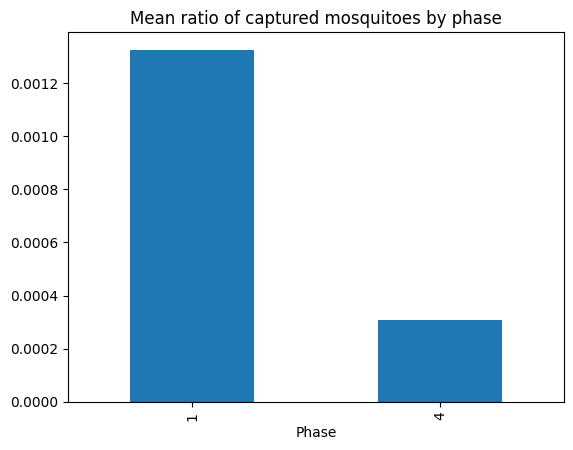

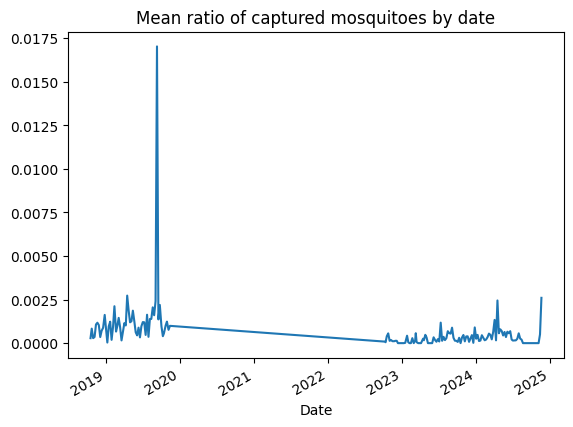

In [32]:
# Plot the values of the ratio for each phase
df_r_weekly.groupby('Phase')['Ratio_capture'].mean().plot(kind='bar')
plt.title('Mean ratio of captured mosquitoes by phase')
plt.show()

# Plot the values of the ratio for each phase daily
df_r_weekly.groupby('Date')['Ratio_capture'].mean().plot()
plt.title('Mean ratio of captured mosquitoes by date')
plt.show()

In [33]:
# The probability of capture can be approximated by the ratio of the number of mosquitoes captured to the number of mosquitoes released in the previous week

df_r_weekly['P_capture'] = 0

for i in range(0, len(df_r_weekly)):
    if i + 1 < len(df_r_weekly) and df_r_weekly['Nb_ind'].iloc[i] != 0:
        df_r_weekly['P_capture'].iloc[i] = df_r_weekly['Captured_M'].iloc[i+1] / df_r_weekly['Nb_ind'].iloc[i]

df_r_weekly.head()

/tmp/ipykernel_12052/2403828610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r_weekly['P_capture'] = 0
/tmp/ipykernel_12052/2403828610.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a singl

,Date,Nb_ind,Phase,Captured_M,Captured_F,Ratio_capture,P_capture
56816,2018-10-17 00:00:00,42090,1,12,59,0.000285,0.000737
57186,2018-10-23 00:00:00,37260,1,31,56,0.000832,0.000510
57556,2018-10-30 00:00:00,66240,1,19,19,0.000287,0.000377
57926,2018-11-06 00:00:00,71070,1,25,35,0.000352,0.000718
58296,2018-11-13 00:00:00,47610,1,51,36,0.001071,0.001239


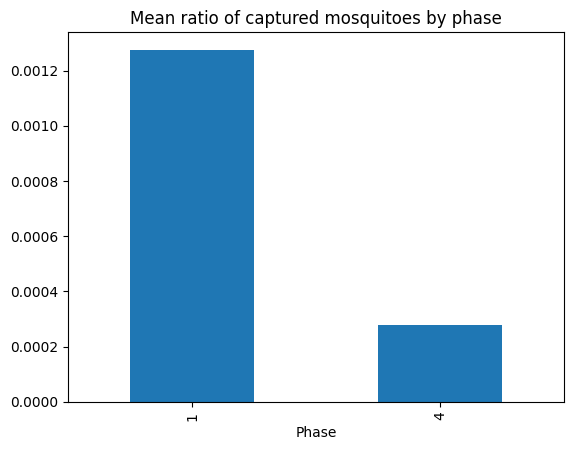

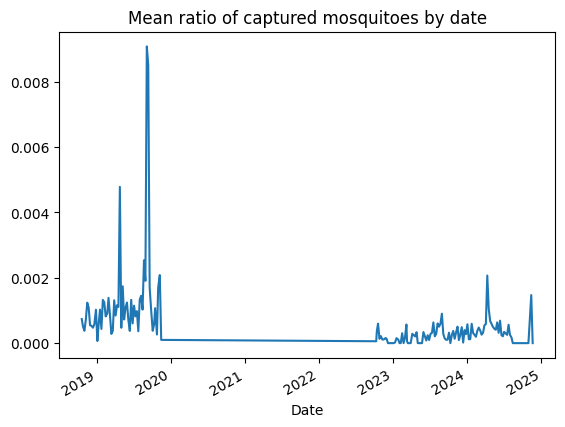

In [34]:
# Plot the values of the proba for each phase
df_r_weekly.groupby('Phase')['P_capture'].mean().plot(kind='bar')
plt.title('Mean ratio of captured mosquitoes by phase')
plt.show()

# Plot the values of the proba for each phase daily
df_r_weekly.groupby('Date')['P_capture'].mean().plot()
plt.title('Mean ratio of captured mosquitoes by date')
plt.show()

In [35]:
# Create a new var, which is the value of Nb_ind divided by the value of Captured_week from the previous week in df_r_weekly. For the first week of the dataset, set the value to 0
df_r_weekly['Ratio_release'] = 0

for i in range(1, len(df_r_weekly)):
    if df_r_weekly['Captured_M'].iloc[i - 1] != 0:
        df_r_weekly['Ratio_release'].iloc[i] = df_r_weekly['Nb_ind'].iloc[i] / df_r_weekly['Captured_M'].iloc[i - 1]
df_r_weekly.head()


/tmp/ipykernel_12052/2749616158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r_weekly['Ratio_release'] = 0
/tmp/ipykernel_12052/2749616158.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a s

,Date,Nb_ind,Phase,Captured_M,Captured_F,Ratio_capture,P_capture,Ratio_release
56816,2018-10-17 00:00:00,42090,1,12,59,0.000285,0.000737,0.000000
57186,2018-10-23 00:00:00,37260,1,31,56,0.000832,0.000510,3105.000000
57556,2018-10-30 00:00:00,66240,1,19,19,0.000287,0.000377,2136.774194
57926,2018-11-06 00:00:00,71070,1,25,35,0.000352,0.000718,3740.526316
58296,2018-11-13 00:00:00,47610,1,51,36,0.001071,0.001239,1904.400000


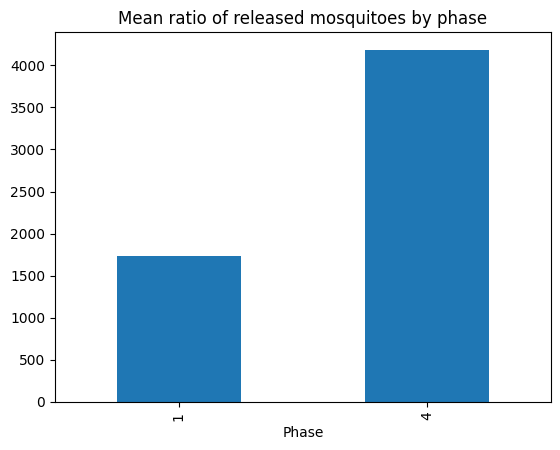

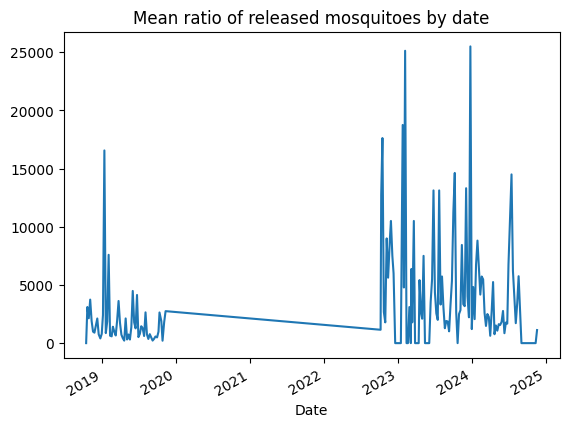

In [36]:
# Plot the values of the ratio for each phase
df_r_weekly.groupby('Phase')['Ratio_release'].mean().plot(kind='bar')
plt.title('Mean ratio of released mosquitoes by phase')
plt.show()

# Plot the values of the ratio for each phase daily
df_r_weekly.groupby('Date')['Ratio_release'].mean().plot()
plt.title('Mean ratio of released mosquitoes by date')
plt.show()

In [37]:
# The probability of capture can be approximated by the ratio of the number of mosquitoes captured to the number of mosquitoes released in the previous week

df_r_weekly['P_capture2'] = 0

for i in range(0, len(df_r_weekly)):
    if i + 2 < len(df_r_weekly) and df_r_weekly['Nb_ind'].iloc[i] + df_r_weekly['Nb_ind'].iloc[i+1]  != 0:
        df_r_weekly['P_capture2'].iloc[i] = (df_r_weekly['Captured_M'].iloc[i+1] + df_r_weekly['Captured_M'].iloc[i+ 2] ) / (df_r_weekly['Nb_ind'].iloc[i] + df_r_weekly['Nb_ind'].iloc[i+1])

df_r_weekly.head()

/tmp/ipykernel_12052/944824225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r_weekly['P_capture2'] = 0
/tmp/ipykernel_12052/944824225.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single

,Date,Nb_ind,Phase,Captured_M,Captured_F,Ratio_capture,P_capture,Ratio_release,P_capture2
56816,2018-10-17 00:00:00,42090,1,12,59,0.000285,0.000737,0.000000,0.000630
57186,2018-10-23 00:00:00,37260,1,31,56,0.000832,0.000510,3105.000000,0.000425
57556,2018-10-30 00:00:00,66240,1,19,19,0.000287,0.000377,2136.774194,0.000553
57926,2018-11-06 00:00:00,71070,1,25,35,0.000352,0.000718,3740.526316,0.000927
58296,2018-11-13 00:00:00,47610,1,51,36,0.001071,0.001239,1904.400000,0.001164


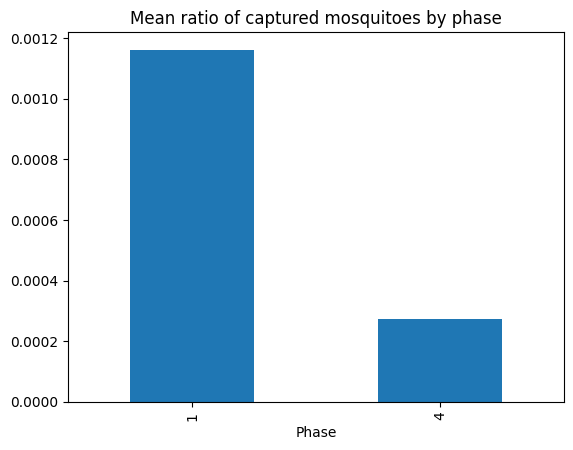

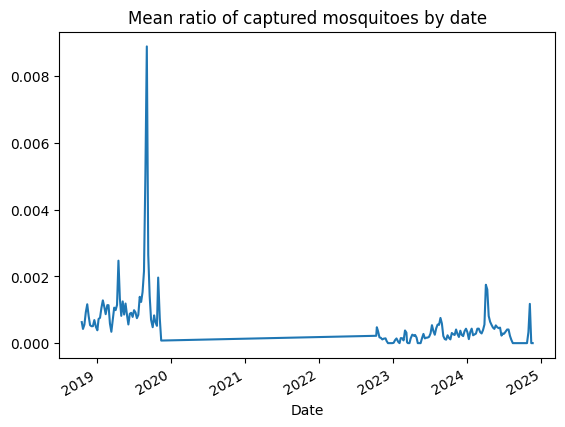

In [38]:
# Plot the values of the proba for each phase
df_r_weekly.groupby('Phase')['P_capture2'].mean().plot(kind='bar')
plt.title('Mean ratio of captured mosquitoes by phase')
plt.show()

# Plot the values of the proba for each phase daily
df_r_weekly.groupby('Date')['P_capture2'].mean().plot()
plt.title('Mean ratio of captured mosquitoes by date')
plt.show()

# Meteo

In [39]:
#open the meteo data, the values are separated by ;

meteo_path = '/home/leo/Documents/These/Données/Meteo/Q_987_previous-1950-2023_RR-T-Vent.csv'
meteo_df = pd.read_csv(meteo_path, sep=';')
# Print the column names to check if they match
print(meteo_df.columns)

# size of meteo_df
print(meteo_df.shape)
meteo_df.head()

Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'RR', 'QRR',
       'TN', 'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR'],
      dtype='object')
(1911640, 58)


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR
0,98711002,ANAA1,-17.357,-145.508333,3,20130315,0.8,1.0,23.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98711002,ANAA1,-17.357,-145.508333,3,20130316,0.0,1.0,25.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98711002,ANAA1,-17.357,-145.508333,3,20130317,0.8,1.0,27.3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,98711002,ANAA1,-17.357,-145.508333,3,20130318,0.0,1.0,26.6,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98711002,ANAA1,-17.357,-145.508333,3,20130319,0.0,1.0,27.1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Keep only the AAAAMMJJ, RR, TX, TM and FXI2 columns
meteo_df = meteo_df[['AAAAMMJJ', 'RR', 'TX', 'TM', 'FFM', 'TN']]

# Convert the 'AAAAMMJJ' column to datetime format and remove all values where the date is before 2014-01-01
meteo_df['AAAAMMJJ'] = pd.to_datetime(meteo_df['AAAAMMJJ'], format='%Y%m%d')
meteo_df = meteo_df[meteo_df['AAAAMMJJ'] >= pd.to_datetime('2014-01-01')]

In [41]:
meteo_df.head()

,AAAAMMJJ,RR,TX,TM,FFM,TN
292,2014-01-01,14.1,30.5,28.0,6.0,26.8
293,2014-01-02,0.0,28.8,26.5,5.2,23.1
294,2014-01-03,27.3,29.0,25.4,2.8,22.4
295,2014-01-04,0.0,29.5,27.2,3.4,25.0
296,2014-01-05,0.0,30.2,28.1,4.9,25.8


In [42]:
# Take the average of each column for each day
meteo_df_mean = meteo_df.groupby('AAAAMMJJ').mean().reset_index()

# Now take the min and max values for each day
meteo_df_min = meteo_df.groupby('AAAAMMJJ').min().reset_index()
meteo_df_max = meteo_df.groupby('AAAAMMJJ').max().reset_index()

# Now do a single data set with the sum of RR for each day, only with the RR column
meteo_df_sum = meteo_df.groupby('AAAAMMJJ')['RR'].sum().reset_index()

# Take a sliding mean that take sinto account the previous two days and the next wo days for TM
meteo_df_min['TM_sliding_mean'] = meteo_df_min['TM'].rolling(window=5, min_periods=1).mean()
meteo_df_mean['TM_sliding_mean'] = meteo_df_mean['TM'].rolling(window=5, min_periods=1).mean()

In [43]:
#get the date for the max of captured mosquitoes in 2021 without using dt.year
max_date = df_poly_c[(pd.to_datetime('2021-01-01') < df_poly_c['Date']) & (df_poly_c['Date'] < pd.to_datetime('2022-01-01'))].groupby('Date')['Nb_ind'].sum().idxmax()
print(max_date)

2021-03-10 00:00:00


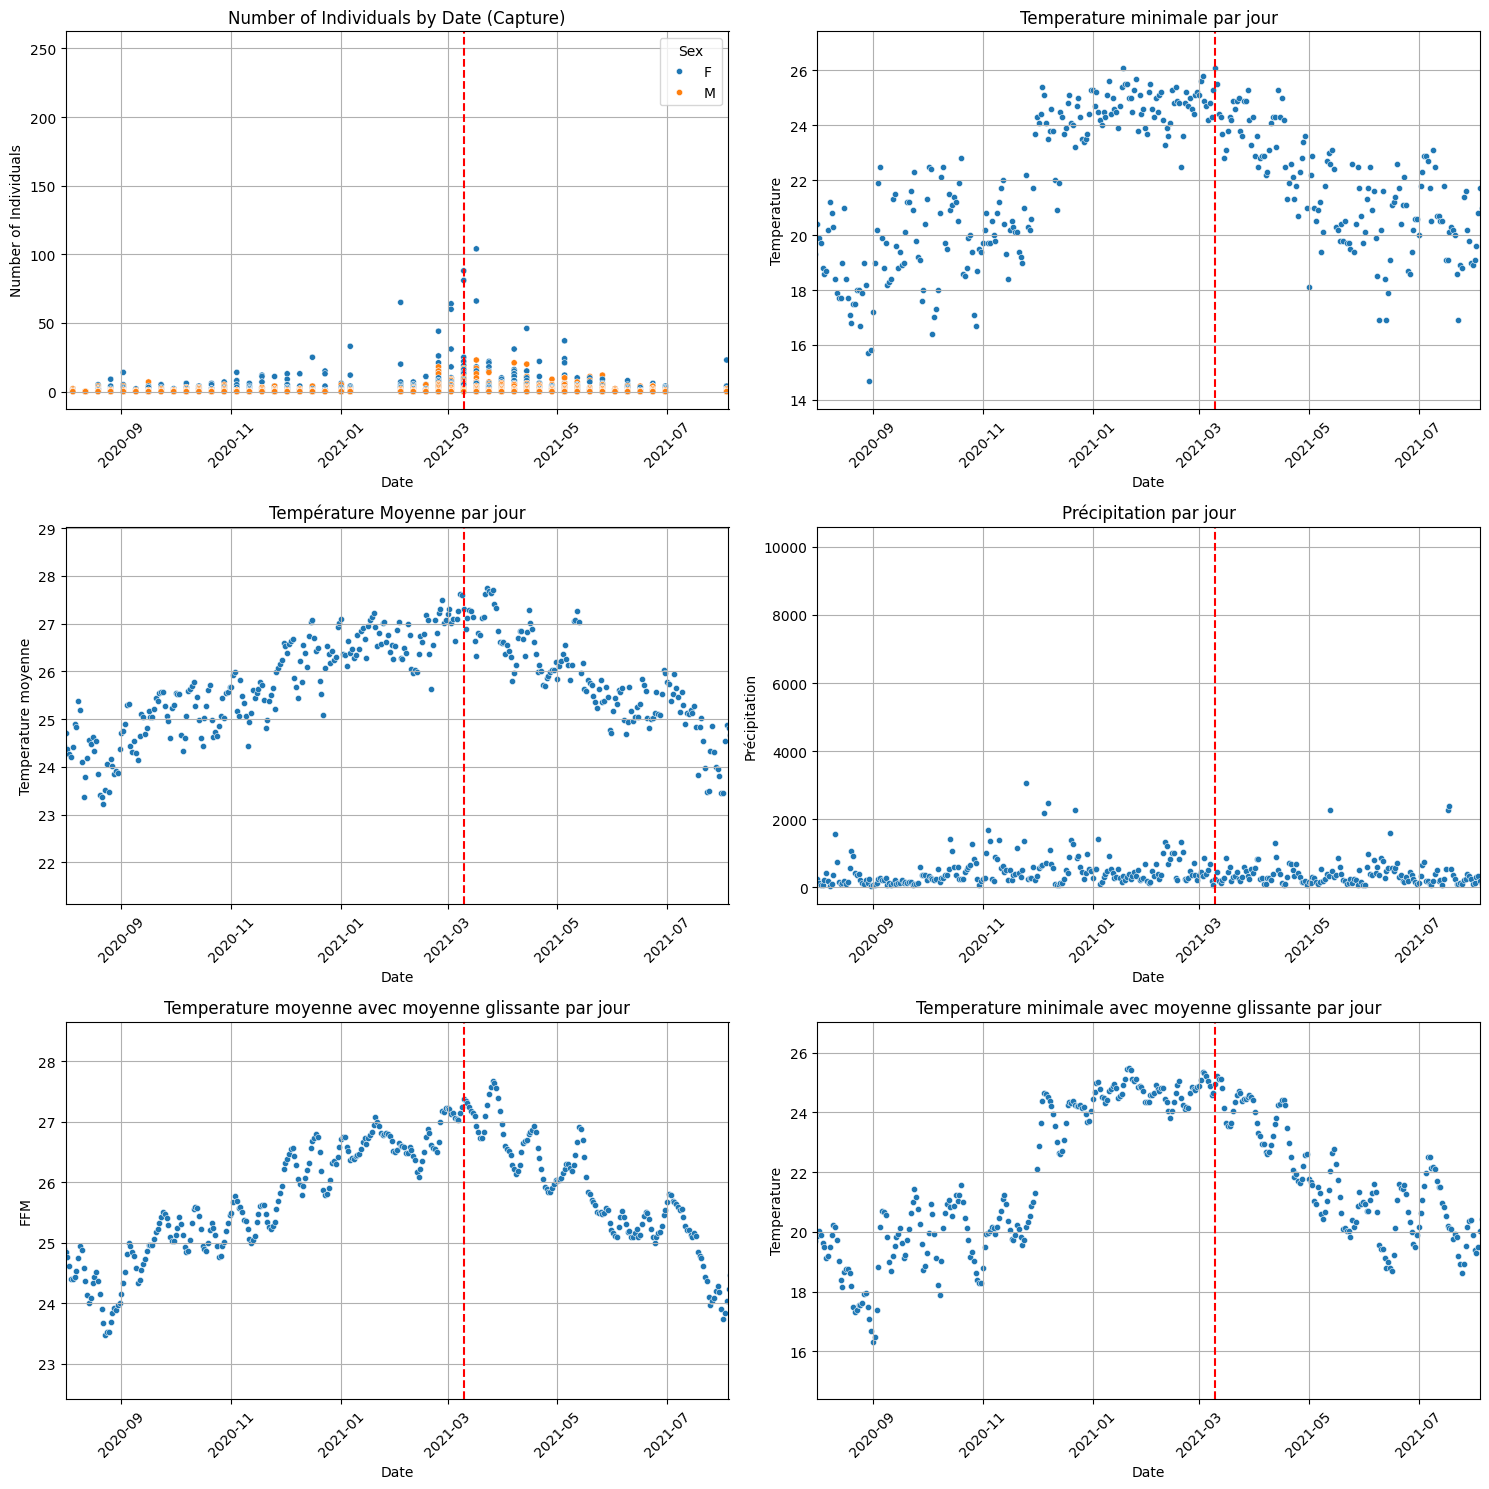

<Figure size 640x480 with 0 Axes>

In [44]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Number of Individuals by Date (Capture)
sns.scatterplot(data=df_poly_c, x='Date', y='Nb_ind', hue='Sex', s=20, ax=axs[0, 0])
axs[0, 0].set_title('Number of Individuals by Date (Capture)')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_xlim(pd.to_datetime('2020-08-01'), pd.to_datetime('2021-08-04'))
axs[0, 0].set_ylabel('Number of Individuals')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].axvline(max_date, color='red', linestyle='--')

# Plot 2: Temperature minimale par jour
sns.scatterplot(data=meteo_df_min, x='AAAAMMJJ', y='TM', s=20, ax=axs[0, 1])
axs[0, 1].set_title('Temperature minimale par jour')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_xlim(pd.to_datetime('2020-08-01'), pd.to_datetime('2021-08-04'))
axs[0, 1].set_ylabel('Temperature')
axs[0, 1].grid(True)
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].axvline(max_date, color='red', linestyle='--')

# Plot 3: Température Moyenne par jour
sns.scatterplot(data=meteo_df_mean, x='AAAAMMJJ', y='TM', s=20, ax=axs[1, 0])
axs[1, 0].set_title('Température Moyenne par jour')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_xlim(pd.to_datetime('2020-08-01'), pd.to_datetime('2021-08-04'))
axs[1, 0].set_ylabel('Temperature moyenne')
axs[1, 0].grid(True)
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].axvline(max_date, color='red', linestyle='--')

# Plot 4: Précipitation par jour
sns.scatterplot(data=meteo_df_sum, x='AAAAMMJJ', y='RR', s=20, ax=axs[1, 1])
axs[1, 1].set_title('Précipitation par jour')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_xlim(pd.to_datetime('2020-08-01'), pd.to_datetime('2021-08-04'))
axs[1, 1].set_ylabel('Précipitation')
axs[1, 1].grid(True)
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].axvline(max_date, color='red', linestyle='--')

# Plot 5: FFM values
sns.scatterplot(data=meteo_df_mean, x='AAAAMMJJ', y='TM_sliding_mean', s=20, ax=axs[2, 0])
axs[2, 0].set_title('Temperature moyenne avec moyenne glissante par jour')
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_xlim(pd.to_datetime('2020-08-01'), pd.to_datetime('2021-08-04'))
axs[2, 0].set_ylabel('FFM')
axs[2, 0].grid(True)
axs[2, 0].tick_params(axis='x', rotation=45)
axs[2, 0].axvline(max_date, color='red', linestyle='--')

# Plot 6: Temperature mpyenne glissante
sns.scatterplot(data=meteo_df_min, x='AAAAMMJJ', y='TM_sliding_mean', s=20, ax=axs[2, 1])
axs[2, 1].set_title('Temperature minimale avec moyenne glissante par jour')
axs[2, 1].set_xlabel('Date')
axs[2, 1].set_xlim(pd.to_datetime('2020-08-01'), pd.to_datetime('2021-08-04'))
axs[2, 1].set_ylabel('Temperature')
axs[2, 1].grid(True)
axs[2, 1].tick_params(axis='x', rotation=45)
axs[2, 1].axvline(max_date, color='red', linestyle='--')

# Hide the empty subplot (2, 1)
#fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()
